In [1]:
import numpy as np
import pandas as pd
import codecs, json
from pathlib import Path
import h5py, pickle
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# Loop over each track and check if it is greater than 200 frames in length
filename = Path('/home/vivek/Tobias_Group/Piezo1/HaloTag_Gabby/Track_Intensities_troubleshooting/AL_55_2020-06-29-TIRFM_Diff_tdt-MEFs_B_4_trackintensities_v2.json')
frame_cutoff = 200
obj_text = codecs.open(filename, "r", encoding="utf-8").read()
pts = json.loads(obj_text)
txy_pts = np.array(pts["txy_pts"])
tracks = [np.array(track) for track in pts["tracks"]]
txy_intensities = np.array(pts["txy_intensities"])
txyi_pts = pd.DataFrame(columns=['TrackID', 'Frame', 'X', 'Y', 'Intensity'])
for trackIndex, _ in enumerate(tracks):
    track = tracks[trackIndex]
    pts = txy_pts[track, :]
    if len(pts) >= frame_cutoff:
        intensity = txy_intensities[track]
        indivTrack = pd.DataFrame(pts, columns=['Frame', 'X', 'Y'])
        indivTrack['Intensity'] = intensity
        indivTrack['TrackID'] = trackIndex
        txyi_pts = pd.concat([txyi_pts, indivTrack])

TrackID  Frame           X           Y   Intensity
0        73    0.0  197.349633  440.485422  135.888889
1        73    1.0  197.397957  440.443887  132.666667
2        73    2.0  197.503382  440.682945  136.777778
3        73    3.0  197.423674  440.722321  136.666667
4        73    4.0  197.539993  440.605019  135.222222
..      ...    ...         ...         ...         ...
211  283221  595.0  192.397535  849.886432  133.555556
212  283221  596.0  192.489570  850.279836  135.555556
213  283221  597.0  192.990009  849.826996  132.333333
214  283221  598.0  192.689770  849.524230  130.222222
215  283221  599.0  192.175353  849.627699  132.111111

[15739 rows x 5 columns]


In [3]:
# Adjust Frame values to be Time
txyi_pts.Frame *= 0.100
txyi_pts.rename(columns={'Frame': 'Time'}, inplace=True)

In [4]:
def plot_v2(data, minMax=[]):
    # Make two subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=([10, 5]))
    # Create the intensity line plot
    g = sns.lineplot(
        x="Time", y="Intensity",
        data=data, linewidth=2, label=f'Track: {data.TrackID[0]}\nLength: {len(data)}',
        ax=axes[0])
    if minMax != []:
        axes[0].set_ylim(minMax)
    axes[0].set_xlim([-5, 65])
    axes[0].set_title('Intensity over Time')
    # Create the trajectory plot to localize the track in the video
    g1 = sns.lineplot(
        x="X", y="Y",
        data=data, linewidth=5, label=f'Track: {data.TrackID[0]}\nLength: {len(data)}',
        ax=axes[1])
    axes[1].set_xlim([0, 1023])
    axes[1].set_ylim([0, 1023])
    axes[1].set_title('Position in Video')
    return plt.gcf(), axes

TrackID  Time           X           Y   Intensity
0        73   0.0  197.349633  440.485422  135.888889
1        73   0.1  197.397957  440.443887  132.666667
2        73   0.2  197.503382  440.682945  136.777778
3        73   0.3  197.423674  440.722321  136.666667
4        73   0.4  197.539993  440.605019  135.222222
..      ...   ...         ...         ...         ...
295      73  29.5  197.807474  440.939524  136.888889
296      73  29.6  197.520890  440.863430  131.777778
297      73  29.7  197.600868  440.824836  135.333333
298      73  29.8  197.642785  440.719592  133.888889
299      73  29.9  197.598508  441.065533  117.777778

[300 rows x 5 columns]


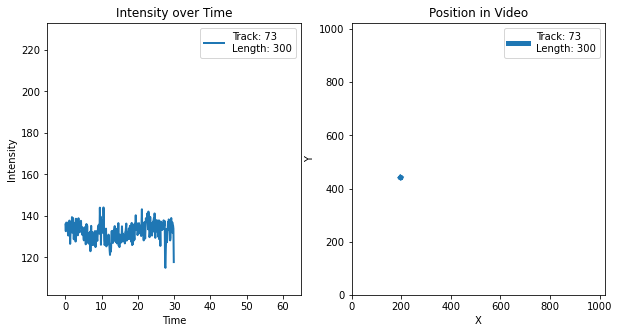

In [5]:
trackIDList = txyi_pts.TrackID.unique()
yMaxVal = int(txyi_pts.Intensity.max()*1.10)
yMinVal = int(txyi_pts.Intensity.min()*0.90)
yaxisMinMax = [yMinVal, yMaxVal]
for eachTrackID in trackIDList:
    indivTrack = txyi_pts.loc[txyi_pts['TrackID'] == eachTrackID]
    plot_v2(indivTrack, yaxisMinMax)